<a href="https://colab.research.google.com/github/anruki/ImgProcessing/blob/main/coins_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clase Procesamiento de imágenes 31/10/2024
## OPEN CV

In [1]:
!pip install opencv-python



---



In [2]:
import cv2

Han desactivado el `imshow()`

In [3]:
# cv.imshow()

Por lo que debemos instalar:

In [4]:
# Especifico de Colab
!pip install opencv-python
!pip install opencv_jupyter_ui
!pip install -q ipycanvas==0.11
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.0 MB/s eta 0:00:00


Para poder usar `imshow()`

In [5]:
import cv2
from matplotlib import pyplot as plt
import opencv_jupyter_ui as jcv2


Ahora hay que ver que imágen usamos

In [6]:
# jcv2.imshow()

En google images buscamos una imágen

In [8]:
coins = cv2.imread("coins.jpg")
jcv2.imshow("",coins)
# plt.imshow(mario)
# plt.show()

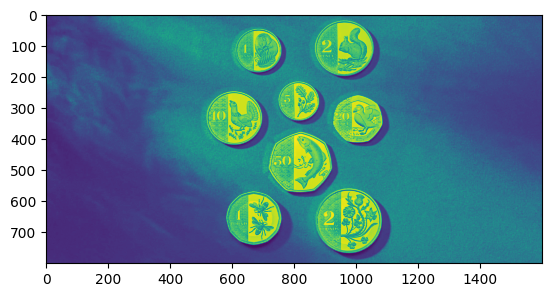

In [9]:
coinsgray = cv2.cvtColor(coins,cv2.COLOR_BGR2GRAY)
plt.imshow(coinsgray)
plt.show()

Sale así porque está en BGR y no RGB

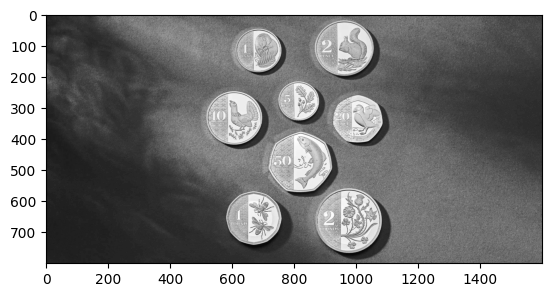

In [14]:
plt.imshow(coinsgray,cmap="gray")
plt.show()

Si quiero aplicar un blur:

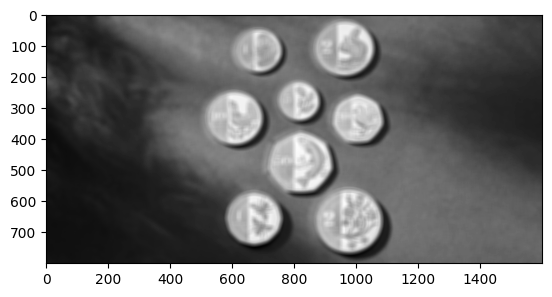

In [16]:
coinsblur = cv2.blur(coinsgray,[16,16])
# Defino la matriz del pinceel brush a mano
# tamaño [16,16]
plt.imshow(coinsblur,cmap="gray")
plt.show()

Binarización

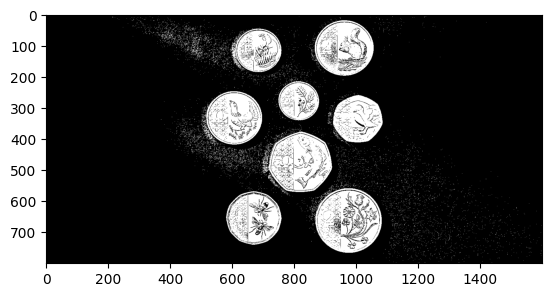

In [21]:
_,coinsbin = cv2.threshold(coinsgray,150,125,cv2.THRESH_BINARY)
plt.imshow(coinsbin,cmap="gray")
plt.show()

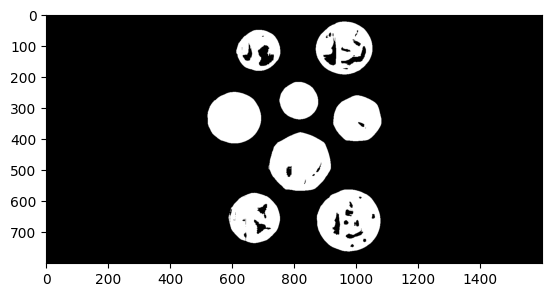

In [23]:
_,coinsbin = cv2.threshold(coinsblur,170,255,cv2.THRESH_BINARY)
plt.imshow(coinsbin,cmap="gray")
plt.show()

In [24]:
coinsbin_display = cv2.cvtColor(coinsbin, cv2.COLOR_GRAY2BGR)
jcv2.imshow("coins",coinsbin_display)

Otro tipo de blur (hay varios tipos):

[Documentación tipos de blur](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

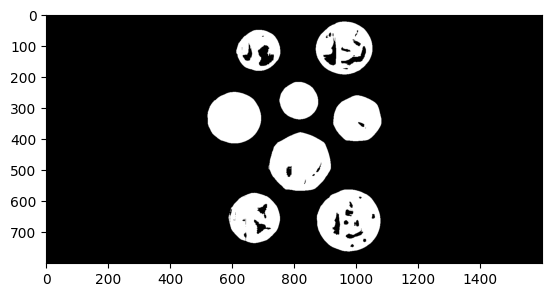

In [25]:
plt.imshow(coinsbin,cmap="gray")
plt.show()

### **Dilate**

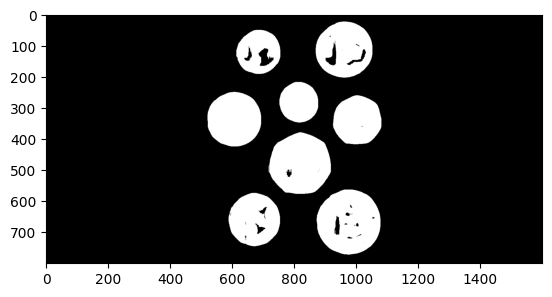

In [26]:
coinsdilate = cv2.dilate(coinsbin,(16,16),iterations=10)
plt.imshow(coinsdilate,cmap="gray")
plt.show()

##**Erode**

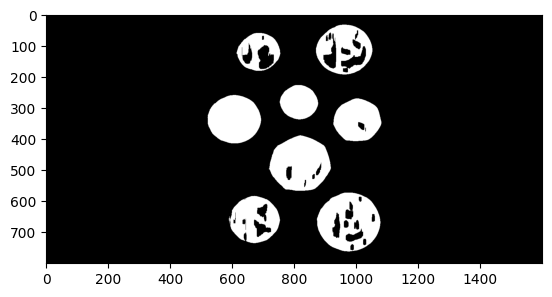

In [27]:
coinserode = cv2.erode(coinsbin,(16,16),iterations=10)
plt.imshow(coinserode,cmap="gray")
plt.show()

## **OPEN & CLOSE**

In [28]:
coinsopen = cv2.dilate(coinserode,(16,16),iterations=20)

coinsclose = cv2.erode(coinsdilate,(16,16),iterations=20)

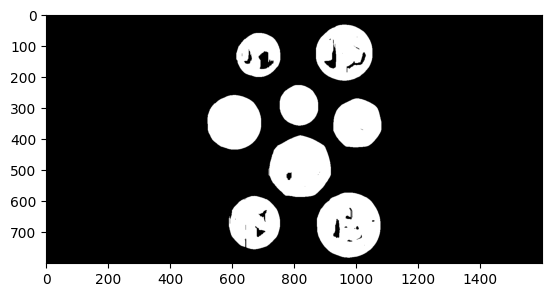

In [29]:
plt.imshow(coinsopen,cmap="gray")
plt.show()

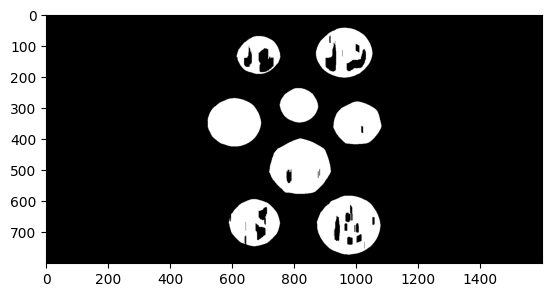

In [30]:
plt.imshow(coinsclose,cmap="gray")
plt.show()

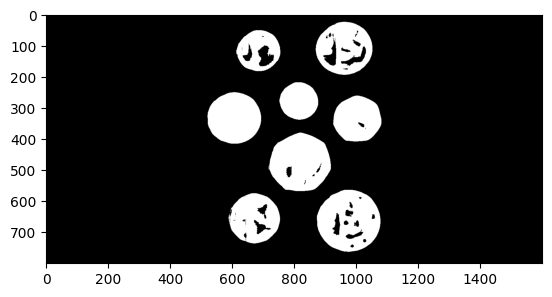

In [38]:
coinsOpen2 = cv2.morphologyEx(coinsbin,cv2.MORPH_OPEN,(8,8))
plt.imshow(coinsOpen2,cmap="gray")
plt.show()

Con  un brush

In [39]:
brush = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,[16,16]) # uso MORPH_ELIPSE porque las monedas son redondas

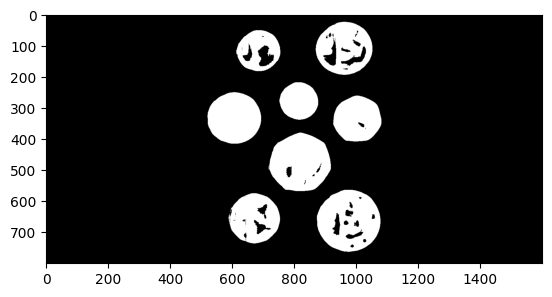

In [40]:
coinsClose2 = cv2.morphologyEx(coinsbin,cv2.MORPH_OPEN,brush)
plt.imshow(coinsOpen2,cmap="gray")
plt.show()

## **Clusterización**

In [41]:
countours, hierarchy = cv2.findContours(coinsOpen2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

coinsclose_display = cv2.cvtColor(coinsclose, cv2.COLOR_GRAY2BGR)
jcv2.imshow("coins",coinsclose_display)

In [42]:
clusters, hierarchy = cv2.findContours(coinsClose2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

coinsclose2_display = cv2.cvtColor(coinsClose2, cv2.COLOR_GRAY2BGR)
jcv2.imshow("coins",coinsclose2_display)

In [48]:
AreaMin = 11000
countCoins = 0
for cluster in clusters:
  Area = cv2.contourArea(cluster)
  if(Area > AreaMin):
    cv2.drawContours(coinsclose2_display, [cluster],-1, (0,255,0),5)
    countCoins = countCoins+1
  print("area = ",Area)

print("coins number = ",countCoins)
jcv2.imshow("title", coinsclose2_display)

area =  19598.0
area =  991.5
area =  107.0
area =  763.5
area =  31303.0
area =  712.0
area =  283.5
area =  131.5
area =  1380.0
area =  718.0
area =  47.5
area =  28753.5
area =  39.0
area =  42.0
area =  531.5
area =  177.5
area =  17808.0
area =  224.0
area =  22357.5
area =  11484.5
area =  11211.5
area =  2.0
area =  10.0
area =  2.0
area =  840.5
area =  13.5
area =  23974.5
area =  247.0
area =  2094.5
area =  2102.0
area =  75.0
coins number =  8
